In [ ]:
 ## transformers : 모델 로딩 및 추론, datasets : 허깅페이스 데이터페이스 사용 peft : 경량 파인튜닝 / accelerate : GPU 최적화, bitsandbytes : polyglot 모델은 크기때문에 메모리 절약용
!pip install transformers datasets peft accelerate bitsandbytes

# HuggingFace로그인 -> polyglot-ko를 불러오기 위함
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
##polyglot-ko 모델 불러오기
from transformers import AutoTokenizer, AutoModelForCausalLM

# 해당 모델은 1.3억 파라미터를 가지고 있어서 우리같은 학생에게 사용하기 좋음(colab에서 학습시킬 예정이기 때문에 가벼운거 사용)
model_name = "EleutherAI/polyglot-ko-5.8b"

#토크나이저 : 자연어 문장을 AI가 처리 할 수 있는 숫자 배열로 바꾸는 역할
#AutoTokenizer.from_pretrained : 사전 학습된 언어 생성 모델을 불러오는 함수
tokenizer = AutoTokenizer.from_pretrained(model_name)
#텍스트 생성	AutoModelForCausalLM(사용중)  / 텍스트 분류 : 	AutoModelForSequenceClassification  / 질문/답변 :	AutoModelForQuestionAnswering  / 번역 :	AutoModelForSeq2SeqLM
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",  ## GPU 자동할당
    load_in_8bit=True  ## 메모리 줄이기
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/164 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not in

model-00001-of-00013.safetensors:   0%|          | 0.00/926M [00:00<?, ?B/s]

model-00003-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00006-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00008-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00002-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00005-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00004-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00007-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00009-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00010-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00011-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00012-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00013-of-00013.safetensors:   0%|          | 0.00/515M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/13 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
############################### 이미 학습된것으로 가져온것 ####################################
# 문장 입력(instruction값 + \n + input값)
input_text = "다음 상황에서 위반된 법률 조항을 식별하시오.\n음주운전했어\n"

#tokenizer
# return_tensors="pt" : PyTorch 텐서로 반환 → 모델에 입력 가능하게 함
inputs = tokenizer(input_text, return_tensors="pt").to(model.device)

#GPT 계열 모델이라 사용하지 않아서 제외
inputs.pop("token_type_ids", None)

# 모델로 텍스트 생성
outputs = model.generate(
    **inputs,
    max_new_tokens=400,      # 최대 생성할 토큰 수
    temperature=0.8,         # 생성 다양성 (높을수록 창의적)
    do_sample=True,          # 무작위 샘플링 사용 -> 같은 문장이라도 결과 다양해짐
    top_k=50,                # 확률 높은 상위 고려 개수
)

# tokenizer의 구성요소 : {vocab : 토큰과 숫자 매핑 딕셔너리, encode() :	문장을 숫자로 변환, decode() : 숫자를 문장으로 복원, (pad_token, eos_token) : 특수 토큰, model_max_length	: 입력 최대 길이}
# 하지만 나는 encode를 사용하지 않음 why? -> tonkenizer의 디폴트 값이 encode에다가 추가 기능(attention mask padding)이 있어 굳이 사용할 필요가 없었기 때문!!!!!
# 결과 출력(decode : 사람 언어로 번역, skip_special_tokens=True : 특수 토큰 제외)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


다음 상황에서 위반된 법률 조항을 식별하시오.
음주운전했어
는한의의를에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ility을를의의에에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ility을의의에에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ility을의의에에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ility을의의에에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ility을의의에에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ility을의의에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ary는을의에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반 법령을 식별한 것에 대해 진술한 것에 대해 설명하고 그의 의견을 쓰시오.ary는을의에게제의되지않았다.위반된 법률 조항을 식별한 것에 대해, 위반


In [ ]:
################################### 파인튜닝하기 ###############################################
from google.colab import files
uploaded = files.upload()

Saving final_train_data_v1.csv to final_train_data_v1.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/final_train_data_template_applied.csv")
df.head(10)

,instruction,input,output
0,다음 상황에서 위반된 법률 조항을 식별하시오.,1. 도로교통법위반(무면허운전) 피고인은 2019. 4. 15. 00:30경 군산시...,"도로교통법 제152조 제1호,도로교통법 제43조,자동차손해배상보장법 제46조 제2항..."
1,다음 상황에서 위반된 법률 조항을 식별하시오.,"피고인은 위와 같이 도로교통법 제44조 제1항을 2회 이상 위반한 사람으로서, 20...","해당 상황은 도로교통법 제148조의2 제1항,도로교통법 제44조 제1항을 위반한 것..."
2,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 2017. 4. 29. 03:16경 대구 중구에 있는 통신골목 부근 노상에...,"해당 행위는 도로교통법 제148조의2 제3항 제2호,도로교통법 제44조 제1항,도로..."
3,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 2020. 3. 5. 04:05경 구미시 B에 있는 C 식당 앞 도로에서부...,"도로교통법 제148조의2 제1항,도로교통법 제44조 제1항을 위반한 행위로 판단됩니다."
4,다음 상황에서 위반된 법률 조항을 식별하시오.,"피고인은 B 포터 화물차의 운전업무에 종사하는 사람인바, 2013. 7. 21. 2...","이 사건은 교통사고처리특례법 제3조 제1항,교통사고처리특례법 제3조 제2항_단서 제..."
5,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 2016. 12. 24. 19:05경 자동차운전면허를 받지 아니하고 B 포...,"해당 행위는 도로교통법 제152조 제1호,도로교통법 제43조에 저촉됩니다."
6,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 2020. 10. 04. 22:19경 성남시 분당구 정자동 상호불상의 음식...,"이 사건은 도로교통법 제148조의2 제1항,도로교통법 제44조 제1항 위반에 해당합니다."
7,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 B 포터 화물차의 운전 업무에 종사하는 사람이다. 피고인은 2017. 3....,"해당 행위는 교통사고처리특례법 제3조 제1항,교통사고처리특례법 제3조 제2항_단서 ..."
8,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 2014. 2. 19. 대구지방법원에서 도로교통법위반(음주운전)죄로 벌금 ...,"법적으로 도로교통법 제148조의2 제1항,도로교통법 제44조 제1항,도로교통법 제1..."
9,다음 상황에서 위반된 법률 조항을 식별하시오.,피고인은 2017. 8. 10. 00:39경 혈중알코올농도 0.204%의 술에 취한...,"도로교통법 제148조의2 제3항 제1호,도로교통법 제44조 제1항을 위반한 행위로 ..."


In [ ]:
!pip install -U datasets transformers accelerate bitsandbytes

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.6.0+cu124
True


In [ ]:
# LoraConfig: LoRA의 구조/하이퍼파라미터 설정용 / get_peft_model(): 기존 모델에 LoRA 모듈을 붙이는 함수 / TaskType: 어떤 태스크인지 명시
from datasets import Dataset

#df_grouped = df.groupby('instruction', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42)).reset_index(drop=True)
#filtered_df = df[df['instruction'].str.strip() == "다음 상황에서 위반된 법률 조항을 식별하시오."]
# HuggingFace에서 쓸 수 있는 Dataset 형식으로 변환
#df_grouped = filtered_df.sample(n=3000, random_state=42).reset_index(drop=True)
#dataset = Dataset.from_pandas(df_grouped)
#dataset = Dataset.from_pandas(filtered_df.reset_index(drop=True))
dataset = Dataset.from_pandas(df.reset_index(drop=True))

from transformers import AutoTokenizer

model_name = "EleutherAI/polyglot-ko-1.3b"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)

# tokenizer로 입력/출력 전처리
def preprocess_function(example):  ## 각 행을 받아서 전처리 해주는 역할
    prompt = f"{example['instruction'].strip()}\n{example['input'].strip()}" # 입력 문장 구성 instruction과 input 값을 \n 으로 구별하여 넣겠다


    # 토크나이즈 (텍스트 → 숫자)
    tokenized = tokenizer(
        prompt,
        truncation=True,   # 문장이 길면 짤라냄 우리는 짤라낼 필요 없을듯?
        max_length=640,
        padding="max_length" # padding은 빈칸(0)을 추가해서 가장 긴 문장과 길이를 맞춤 /longest를 사용할 수도 있지만 그건 안전성과 예측이 떨어짐
    )                        # 마스크 : 빈칸 0을 추가하는것

    # output도 토크나이즈 해야됌(모델이 예측해야할 결과값이기 때문)
    labels = tokenizer(
        example['output'].strip(),
        truncation=True,
        max_length=640,
        padding="max_length"
    )
    labels_ids = labels["input_ids"]
    labels_ids = [
        (label if label != tokenizer.pad_token_id else -100)
        for label in labels_ids
    ]
    tokenized["labels"] = labels_ids # Trainer는 labels라는 key를 학습용 정답으로 인식
    return tokenized

# 데이터셋 전체 전처리
tokenized_dataset = dataset.map(preprocess_function, batched=False)

# 필요한 모듈
from peft import LoraConfig, get_peft_model, TaskType, prepare_model_for_kbit_training
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer, BitsAndBytesConfig, default_data_collator

#LoRA : 기존 모델을 두고 가벼운 학습용 파라미터만 추가로 학습 -> colab에서 사용하기 적합

!pip install -U transformers accelerate bitsandbytes
# 양자화 설정 (4bit)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,          # 4bit 양자화 활성화
    bnb_4bit_use_double_quant=True,  # 추가 양자화 -> 더 안정적
    bnb_4bit_quant_type="nf4",  # 4bit quantization 방식
    bnb_4bit_compute_dtype="float16"  # 연산 dtype: float16
)


# 모델 로드할 때 양자화 적용
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config
)

tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

model = prepare_model_for_kbit_training(model)

# QLoRA 설정 (거의 동일)
lora_config = LoraConfig(
    r=8,            # 로우 랭크 차원 수 -> 적을수록 경량 많을 수록 성능 좋아짐   ( 로우 랭크 차원: 작은 보조 행렬만 학습시키는것 )
    lora_alpha=16,   #  학습 속도 및 안정성 조절 r의 2~4의 배수로 결정
    target_modules=["query_key_value", "dense"],  # polyglot은 GPT류라 query, value projection layer만 학습  / 영향이 제일 큰부분들이라 -> Query : 어떤 토큰이 어디에 주목해야할지 결정 , Value : 어떤 정보를 넘겨줄지 결정
    lora_dropout=0.1,             #	과적합 방지용 드롭아웃 0~1    / 드롭아웃 : 일부 뉴런(노드)을 무작위로 꺼버리는 것 -> 뉴런(노드) : 딥러닝 모델에서 입력 값을 받아 계산을 수행하고, 출력을 내보내는 단위 연산자
    bias="none",   #	bias 파라미터는 건들지 않음 기본값은 과적합에 영향을 끼치기때문
    task_type=TaskType.CAUSAL_LM #GPT 계열은 왼쪽 ->오른쪽 생성(CausalLM 명시) -> 우리는 글을 왼쪽에서 오른쪽으로 읽기 때문에 gpt도 나는 밥을 이라는 문장을 보고 먹었다 굶었다 라는 단어 예측을 하기 떄문
)

# 모델에 LoRA 적용
model = get_peft_model(model, lora_config)

# 학습 설정
training_args = TrainingArguments(
    output_dir="./polyglot-finetuned",  #	학습된 모델과 로그가 저장될 폴더
    per_device_train_batch_size=32,    #	배치 크기 설정   / 배치크기 : 전체 데이터셋을 몇개로 나눠 학습시키는가
    num_train_epochs=10,         # 전체 데이터셋을 몇 번 학습할지   / 모델은 바로 이해 못한다 -> 여러바퀴를 돌려 이해를 시켜줘야됨
    learning_rate=2e-4,         #	학습 속도 조절 값 : 가중치를 얼마나 크게 바꿀지  / 자연상수가 아닌 작은값을 사용하기 때문 작으면 정확성 향상 but 학습 느려짐
    fp16=True,                  #	GPU 연산을 절반 정밀도로 해서 속도+메모리 최적화
    gradient_checkpointing=True,   # epoch마다 저장
    logging_steps=10,         #	10 step마다 로그 출력
    logging_dir="./logs",    # 로그저장
    save_strategy="epoch",    # 1에폭 끝날 때마다 모델 저장
    report_to="tensorboard"   #로그 추적
)

# 데이터 패딩 정렬 도우미
data_collator = default_data_collator

# Trainer 설정
trainer = Trainer(
    model=model,
    args=training_args,   #	위에서 설정한 학습 하이퍼파라미터
    train_dataset=tokenized_dataset,  #	전처리 완료된 학습 데이터셋
    tokenizer=tokenizer,        #	출력 디코딩용 토크나이저
    data_collator=data_collator #	배치 구성 자동화 도구
)

special_tokens_map.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Map:   0%|          | 0/13871 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-6-a70e0a291ad8>:108: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
# 학습
trainer.train()
# Drive에 저장
output_dir = "/content/drive/MyDrive/saved_polyglot_lora_0517_last"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


NameError: name 'trainer' is not defined

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/640 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00002-of-00003.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/748M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

100%|██████████| 8775/8775 [04:30<00:00, 32.47it/s]
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



📊 Test Loss 통계:
- 평균: 5.1286
- 표준편차: 0.3840
- 최소: 3.8511
- 최대: 8.5628


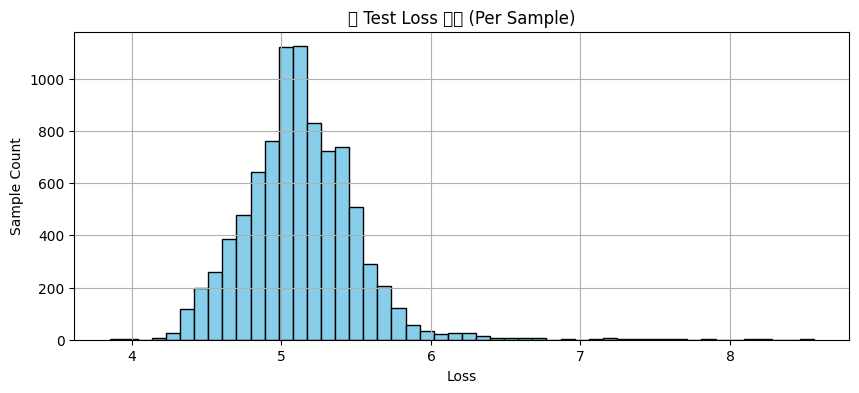

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM

# ✅ 모델 경로 및 데이터 로드
model_path = "/content/drive/MyDrive/saved_polyglot_lora_0517_last"
test_csv_path = "/content/drive/MyDrive/final_test_template_applied.csv"
df = pd.read_csv(test_csv_path).dropna(subset=[ "input", "output"])

# ✅ 모델과 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype=torch.float16, device_map="auto")
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id
model.eval()

# ✅ Loss 계산 함수
def compute_loss(input_text, output_text):
    prompt = input_text.strip()  # 🔹 instruction 없이 input만 사용

    input_ids = tokenizer(prompt, truncation=True, max_length=512, padding="max_length", return_tensors="pt").input_ids.to(model.device)
    labels = tokenizer(output_text.strip(), truncation=True, max_length=512, padding="max_length", return_tensors="pt").input_ids.to(model.device)
    labels[labels == tokenizer.pad_token_id] = -100

    with torch.no_grad():
        outputs = model(input_ids=input_ids, labels=labels)
        return outputs.loss.item()

# ✅ 전체 Loss 계산
losses = []
for i in tqdm(range(len(df))):
    row = df.iloc[i]
    losses.append(compute_loss(row['input'], row['output']))

# ✅ 통계 분석 출력
loss_array = np.array(losses)
print("\n📊 Test Loss 통계:")
print(f"- 평균: {loss_array.mean():.4f}")
print(f"- 표준편차: {loss_array.std():.4f}")
print(f"- 최소: {loss_array.min():.4f}")
print(f"- 최대: {loss_array.max():.4f}")

# ✅ 히스토그램 시각화
plt.figure(figsize=(10, 4))
plt.hist(loss_array, bins=50, color='skyblue', edgecolor='black')
plt.title("📉 Test Loss 분포 (Per Sample)")
plt.xlabel("Loss")
plt.ylabel("Sample Count")
plt.grid(True)
plt.show()

# 상위 n개 추출
n = 1000
top_loss_indices = np.argsort(loss_array)[-n:][::-1]

# 상위 loss 샘플 확인
df_top_loss = df.iloc[top_loss_indices].copy()
df_top_loss["loss"] = loss_array[top_loss_indices]

# CSV로 저장
df_top_loss.to_csv("/content/high_loss_samples.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np

# test 데이터셋 로드
df = pd.read_csv("/content/drive/MyDrive/final_test_merge.csv").dropna(subset=["instruction", "input", "output"])

# 이전에 계산한 losses 리스트를 불러온다고 가정 (예시로 임의 값 사용)
# 실제로는 model 추론 후 얻은 losses 리스트를 여기에 대입
losses = [...]  # <- 네가 계산한 loss 리스트 넣기

# numpy 배열로 변환
loss_array = np.array(losses)

# 상위 n개 추출
n = 30
top_loss_indices = np.argsort(loss_array)[-n:][::-1]

# 상위 loss 샘플 확인
df_top_loss = df.iloc[top_loss_indices].copy()
df_top_loss["loss"] = loss_array[top_loss_indices]

# CSV 저장도 가능
df_top_loss.to_csv("/content/high_loss_samples.csv", index=False)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# ✅ 1. 모델 로드
model_path = "/content/drive/MyDrive/saved_polyglot_lora_0517_last"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype=torch.float16, device_map="auto")
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id
model.eval()

# ✅ 2. 사용자 질문 입력
instruction = "다음 상황에서 위반된 법률 조항을 식별하시오."
input_text = """술마셨어\n"""

prompt = f"{input_text}"

# ✅ 3. 토큰화 및 추론
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=640).to(model.device)

with torch.no_grad():
    outputs = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_new_tokens=256,
        do_sample=False,
        repetition_penalty=1.5,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.pad_token_id,
    )

# ✅ 4. 출력 결과 확인
decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\n입력 값 :\n", prompt)
print("\n생성된 답변:\n", decoded[len(prompt):].strip())


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]


입력 값 :
 술마셨어


생성된 답변:
 조의. 제1항에,을호는이를법은하가)시행한 시행규칙제령 규정로심판 법2년으로 개정되 시행령3특례규정 관한교통 위반 것 경우 등관한8(910도로5등 취소취소 및 도로인처분할 때 2기칙기준 청구 있한다 처분면허 적용하여 운전행위처벌]6점과 자동차위반자동차 이청구 수 해당7 1 8다13」에서14시 처벌법규 ‘지중 위12정지운전 행위공무원법령4 정지된 또는 중53’ 할 10 점11·47 사건처리 공무원만40의무적으로도 「부 5번호여38 따른 3에도 불구하고행정상 7취17조 규칙 따르도록 행정32사항 같23 위법적 사유여객에게 13서 이상 의함여야 함다는 받게 법률개정 되어「사유조항위소20% 그30조 일련조 법령 조조 기준면50조 교통 교통사고. 따라.였.하면 11조고[ 주장므로 9조을 인정조조조 건을 2004 동안.을경유지 이유로 12조조조 피. 유지기간조조조조조 필요 하 피해사실자15조조조조 동 의무조조조조 규율범죄조조조조이라적용


In [ ]:
!zip -r /content/drive/MyDrive/saved_polyglot_lora_0516_1.zip /content/drive/MyDrive/saved_polyglot_lora_0516_1


  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/ (stored 0%)
  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/README.md (deflated 66%)
  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/adapter_model.safetensors (deflated 7%)
  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/adapter_config.json (deflated 54%)
  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/tokenizer_config.json (deflated 81%)
  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/special_tokens_map.json (deflated 52%)
  adding: content/drive/MyDrive/saved_polyglot_lora_0516_1/tokenizer.json (deflated 83%)


In [ ]:
import pandas as pd
from datasets import Dataset
import torch

df_val = pd.read_csv("final_val_merge.csv")
val_dataset = Dataset.from_pandas(df_val)
print("Validation 데이터셋 불러오기 완료")

tokenized_val_dataset = val_dataset.map(preprocess_function, batched=False)
print("Validation 데이터 전처리 완료")

#평가
val_metrics = trainer.evaluate(eval_dataset=tokenized_val_dataset)

print("Validation 평가 완료")
print(val_metrics)


FileNotFoundError: [Errno 2] No such file or directory: 'final_val_merge.csv'